In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 11)

In [13]:
#One Hot Encode Geography and Gender column

df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
#For scaling between -1 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [21]:
X_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [22]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2026-02-15 03:07:55.502351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771124875.723611      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771124875.788293      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771124876.318168      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771124876.318237      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771124876.318240      17 computation_placer.cc:177] computation placer alr

In [23]:
model = Sequential()

In [24]:
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-15 03:08:11.263640: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7594 - loss: 0.5811 - val_accuracy: 0.8006 - val_loss: 0.4558
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4580 - val_accuracy: 0.8144 - val_loss: 0.4274
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4451 - val_accuracy: 0.8231 - val_loss: 0.4175
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.4210 - val_accuracy: 0.8269 - val_loss: 0.4112
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8123 - loss: 0.4247 - val_accuracy: 0.8269 - val_loss: 0.4039
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8326 - loss: 0.4041 - val_accuracy: 0.8338 - val_loss: 0.3941
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8404 - loss: 0.3913 - val_accuracy: 0.8381 - val_loss: 0.3832
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3750 - val_accu

In [27]:
history.history

{'accuracy': [0.7873437404632568,
  0.801562488079071,
  0.8131250143051147,
  0.8189062476158142,
  0.82421875,
  0.8321874737739563,
  0.8423437476158142,
  0.8482812643051147,
  0.8510937690734863,
  0.8548437356948853,
  0.8557812571525574,
  0.8557812571525574,
  0.8590624928474426,
  0.8581249713897705,
  0.858593761920929,
  0.8582812547683716,
  0.8587499856948853,
  0.8600000143051147,
  0.8582812547683716,
  0.8595312237739563,
  0.860156238079071,
  0.8606250286102295,
  0.8623437285423279,
  0.8600000143051147,
  0.8617187738418579,
  0.8610937595367432,
  0.8615624904632568,
  0.8623437285423279,
  0.8609374761581421,
  0.862500011920929,
  0.8618749976158142,
  0.86328125,
  0.8620312213897705,
  0.8626562356948853,
  0.8628125190734863,
  0.8617187738418579,
  0.8614062666893005,
  0.8623437285423279,
  0.8620312213897705,
  0.8618749976158142,
  0.8643749952316284,
  0.8634374737739563,
  0.864062488079071,
  0.8628125190734863,
  0.862500011920929,
  0.864062488079071,

In [28]:
model.layers[0].get_weights()

[array([[-0.01763649,  0.12237351,  0.15913212, -0.07986178, -0.07454459,
          0.14964497,  0.0177995 , -0.06250922, -0.0255806 ,  0.06769168,
         -0.03553346],
        [-0.2404246 ,  0.16762601, -0.6590356 , -0.43549857,  0.5927424 ,
          0.39390242,  1.2357471 , -0.6136544 , -0.01552179, -0.82452345,
          0.37395665],
        [-0.02925905,  0.19315729, -0.05559145, -0.30385613,  0.09805047,
         -0.4424651 , -0.04766699, -0.11979524,  0.04197646,  0.32954395,
         -0.09443035],
        [-0.1708826 ,  0.27689835,  0.11474685, -0.11672124,  0.11946078,
         -0.56451327, -0.4323167 , -0.05010709, -0.80807585,  0.79758674,
          0.11733959],
        [-1.1169258 ,  0.1264888 ,  0.08355334, -0.52603644,  0.33233428,
          0.21355376, -0.86872375, -0.36177933, -0.22645286, -0.3970272 ,
          1.1844904 ],
        [ 0.09024281,  0.19807272, -0.04843655,  0.14182854,  0.23368806,
         -0.17167696, -0.17623083,  0.07176114, -0.3121119 , -0.3547504

In [29]:
model.layers[1].get_weights()

[array([[-4.36852872e-01,  5.31239986e-01,  2.36971036e-01,
         -6.69700027e-01,  7.33771265e-01, -4.33894187e-01,
         -1.25992656e+00, -8.00478816e-01,  3.01384199e-02,
         -3.50228041e-01,  3.48575599e-02],
        [-1.72312111e-01, -1.44137621e-01,  4.15024668e-01,
         -7.40183285e-03,  1.44292697e-01,  6.26862347e-01,
         -3.10262114e-01, -3.51404816e-01,  2.27354109e-01,
          3.91019672e-01,  4.43222821e-01],
        [-2.66424716e-01, -7.15917051e-01,  2.96283126e-01,
         -5.03104746e-01,  2.00537741e-02,  3.71657223e-01,
          5.80441430e-02, -4.63109732e-01,  9.14212465e-02,
          1.87717378e-01,  3.39619875e-01],
        [-2.12083921e-01,  8.12998265e-02,  2.85843849e-01,
          2.94474721e-01, -2.00660095e-01,  6.82018280e-01,
         -5.36402613e-02, -1.57784551e-01, -3.49535227e-01,
          3.68276328e-01, -4.77860600e-01],
        [-1.63883008e-02, -1.20982599e+00, -4.30854917e-01,
          8.78057107e-02, -2.02246428e-01, -

In [30]:
model.layers[2].get_weights()

[array([[ 1.3815428 ],
        [ 0.5895113 ],
        [ 0.6533475 ],
        [ 0.35929686],
        [ 0.20180538],
        [-0.55831254],
        [-1.1349487 ],
        [-0.8071023 ],
        [ 0.6017676 ],
        [-0.9460172 ],
        [-0.44932136]], dtype=float32),
 array([-0.239158], dtype=float32)]

In [31]:
y_log = model.predict(X_test_scaled)
print(y_log)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.05312752]
 [0.00627895]
 [0.10786248]
 ...
 [0.7419908 ]
 [0.0414774 ]
 [0.26740122]]


In [32]:
y_pred = np.where(y_log>0.5,1,0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.859

In [34]:
import matplotlib.pyplot as plt

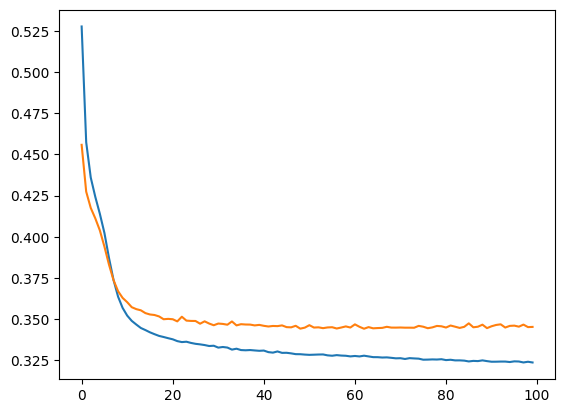

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

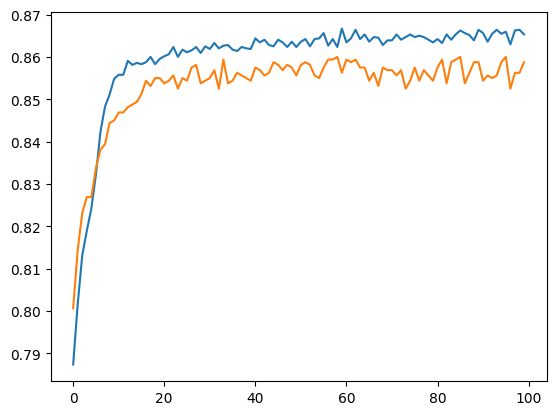

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])